In [177]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

from nltk.lm import Laplace
from numba import jit
from collections import Counter
np.random.seed(42)
plt.style.use('ggplot')

## ***Моделирование***

In [2]:
def sturges_rule (N : int) -> int:
    return int(1+np.floor(np.log2(N)))

## Задание 1

### Задание 1.1

#### Самописная функця

In [178]:
@jit(nopython = True)
def generation_Bernoulian_random_var (p : np.double) -> int:
    """
    Генерирует псевдослучайную величину с распределением Бернулли.
    :param p: Вероятность успеха (0 <= p <= 1)
    :return: Случайная величина с распределением Бернулли.
    """
    U = np.random.random()
    return 1 if U < p else 0

In [179]:
N_Ber= 10000
P_Ber = 0.32

In [180]:
Bernoulian_vars =[]
for i in range (N_Ber):
    Bernoulian_vars.append(generation_Bernoulian_random_var(P_Ber))


#### Встроенная реализация

In [181]:
Bernoulian_vars_check = np.random.binomial(1,P_Ber,N_Ber)

#### Сравнение

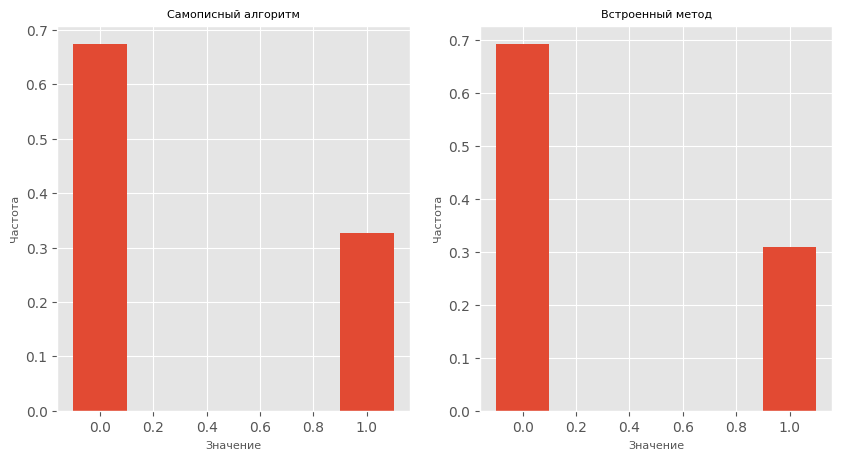

In [182]:
plt.figure(figsize=(10, 5))
plt.subplot (1,2,1)
counter = Counter(Bernoulian_vars)
X_Bernoulian = list(counter.keys())
Y_Bernoulian = list(counter.values())
Y_Bernoulian = [y / N_Ber for y in Y_Bernoulian]

plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Bernoulian, Y_Bernoulian, width=0.2)

plt.subplot (1,2,2)
counter = Counter(Bernoulian_vars_check)
X_Bernoulian_check = list(counter.keys())
Y_Bernoulian_check = list(counter.values())
Y_Bernoulian_check = [y / N_Ber for y in Y_Bernoulian_check]

plt.title('Встроенный метод', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Bernoulian_check, Y_Bernoulian_check, width=0.2)

plt.show()

### Задание 1.2

#### Самописная функця

In [184]:
@jit(nopython = True)
def generation_Binomial_random_var (n : int, p : np.double) -> int :
    """
    Генерирует псевдослучайную величину X ~ Bin(n,p).
    :param n: Количество независимых испытаний.
    :param p: Вероятность успеха в отдельном испытании (0 <= p <= 1).
    :return: X ~ Bin(n,p).
    """
    help_bernoulian_vars = []
    for i in range (n):
        help_bernoulian_vars.append(generation_Bernoulian_random_var(p))
    return sum(help_bernoulian_vars)

In [185]:
N_Bin= 10000
P_Bin = 0.44
n_Bin = 10

In [186]:
Binomial_vars =[]
for i in range (N_Bin):
    Binomial_vars.append(generation_Binomial_random_var(n_Bin,P_Bin))

#### Встроенная реализация для проверки

In [187]:
Binomial_vars_check = np.random.binomial(n_Bin,P_Bin,N_Bin)

#### Сравнение

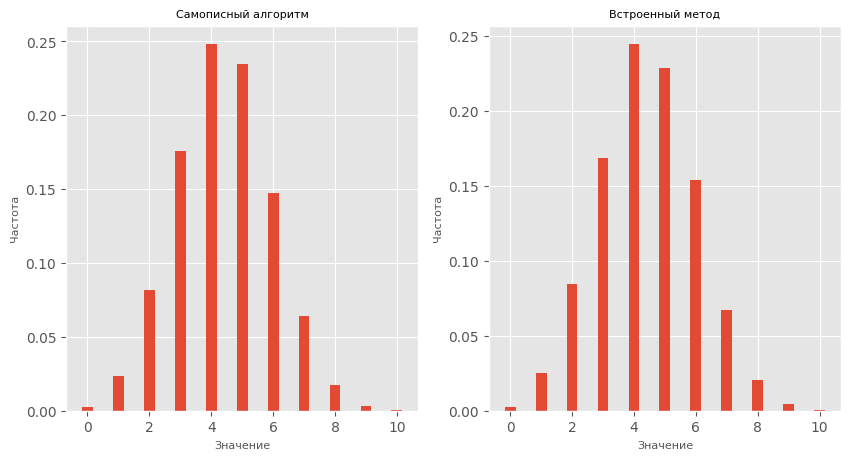

In [189]:
plt.figure(figsize=(10, 5))
plt.subplot (1,2,1)
counter = Counter(Binomial_vars)
X_Binomial = list(counter.keys())
Y_Binomial = list(counter.values())
Y_Binomial = [y / N_Bin for y in Y_Binomial]

plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Binomial, Y_Binomial, width=0.35)

plt.subplot (1,2,2)
counter = Counter(Binomial_vars_check)
X_Binomial_check = list(counter.keys())
Y_Binomial_check = list(counter.values())
Y_Binomial_check = [y / N_Ber for y in Y_Binomial_check]

plt.title('Встроенный метод', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Binomial_check, Y_Binomial_check, width=0.35)

plt.show()

### Задание 1.3

#### Самописная функция

In [87]:
@jit(nopython = True)
def generation_geometric_random_var (p : np.double) -> int:
    """
    Генерирует псевдослучайную величину X ~ Geometric(p).
    :param p: Вероятность успеха в отдельном испытании (0 <= p <= 1).
    :return: X ~ Geometric(p).
    """
    Geometric = 0
    while (True):
        Geometric +=1
        if generation_Bernoulian_random_var(p) == 1 :
            break
    return Geometric

In [88]:
P_Geo = 0.21
N_Geo = 100000

In [89]:
Geometric_vars = []
for i in range (N_Geo):
    Geometric_vars.append(generation_geometric_random_var(P_Geo))

#### Встроенная реализация

In [90]:
Geometric_vars_check = np.random.geometric(P_Geo, N_Geo)

#### Сравнение

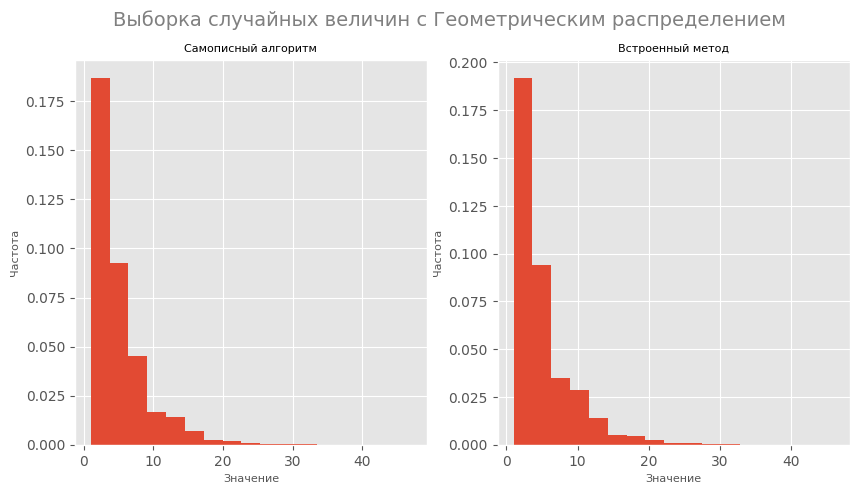

In [91]:
plt.figure(figsize=(10, 5))
m3 = sturges_rule(N_Geo)
                  
plt.subplot (1,2,1)
plt.hist(Geometric_vars, bins = m3,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)

plt.subplot (1,2,2)
plt.hist(Geometric_vars_check, bins = m3,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с Геометрическим распределением', fontsize=14, color = 'gray')
plt.show()

### Задание 1.4

#### Самописная функция

 ***Справка***

Для моделирования случайных величин используется алгоритм, основывающийся на соотношении распределения Пуассона с параметром \\(\lambda\\) и экспоненциального распределения с параметром \\(\frac{1}{\lambda}\\). Таким образом, для генерирования выборки из псевдослучайной величины \\(X \sim P(\lambda)\\) выполняются следующие операции:

1. Принимается \\(a = e^{-\lambda}\\), \\(b = 1\\) и \\(i = 0\\).

2. Генерируется псевдослучайное число \\(u_{i+1} \sim U(0, 1)\\) из непрерывного равномерного распределения на отрезке \\((0, 1)\\), после чего присваиваются значения \\(b = b \cdot u_{i+1}\\).

3. Если \\(b < a\\), то возвращается значение \\(x = i\\), в противном случае происходит переход к шагу 2 при \\(i = i + 1\\).


In [191]:
@jit(nopython=True)
def generation_Poisson_random_var(Lambda : np.double) -> int:
    """
    Генерирует псевдослучайную величину X ~ Poisson(λ).
    :param Lambda: Параметр распределения λ
    :return: X ~ Poisson(λ)
    """
    a = np.exp(-Lambda)
    b = 1
    i = 0
    
    while b>=a :
        u = np.random.random()
        b*= u
        i+= 1
    return i

In [192]:
Lambda_Poisson = 10
N_Poisson = 100000

In [193]:
Poisson_vars = []
for i in range (N_Poisson):
    Poisson_vars.append(generation_Poisson_random_var(Lambda_Poisson))

#### Встроенная реализация

In [194]:
Poisson_vars_check = np.random.poisson(Lambda_Poisson, N_Poisson)

#### Сравнение

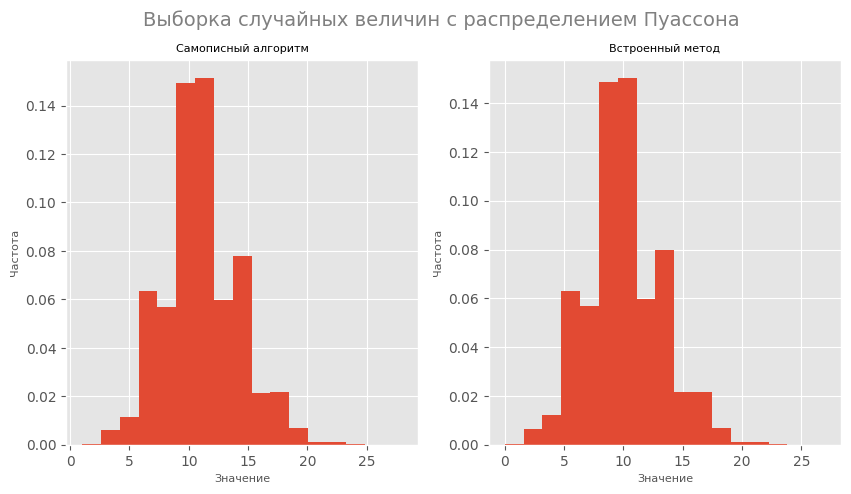

In [195]:
plt.figure(figsize=(10, 5))
m4 = sturges_rule(N_Poisson)
                  
plt.subplot (1,2,1)
plt.hist(Poisson_vars, bins = m4,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)

plt.subplot (1,2,2)
plt.hist(Poisson_vars_check, bins = m4,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с распределением Пуассона', fontsize=14, color = 'gray')
plt.show()

### Задание 1.5

#### Самописная функция

In [196]:
@jit(nopython=True)
def generation_uniform_random_var (a : np.double, b : np.double) -> np.double:
    """
    Генерирует псевдослучайную величину X ~ U[a,b].
    :param a: Левая граница отрезка.
    :param b: Правая граница отрезка.
    :return: X ~ U[a,b].
    """
    u = np.random.random()
    return a + (b-a)*u

In [197]:
a_uniform = 1.1
b_uniform = 21.3
N_uniform = 100000

In [198]:
uniform_vars = []
for i in range (N_uniform):
    uniform_vars.append(generation_uniform_random_var(a_uniform, b_uniform))

#### Встроенная реализация

In [199]:
uniform_vars_check = np.random.uniform(a_uniform, b_uniform, N_uniform)

#### Сравнение

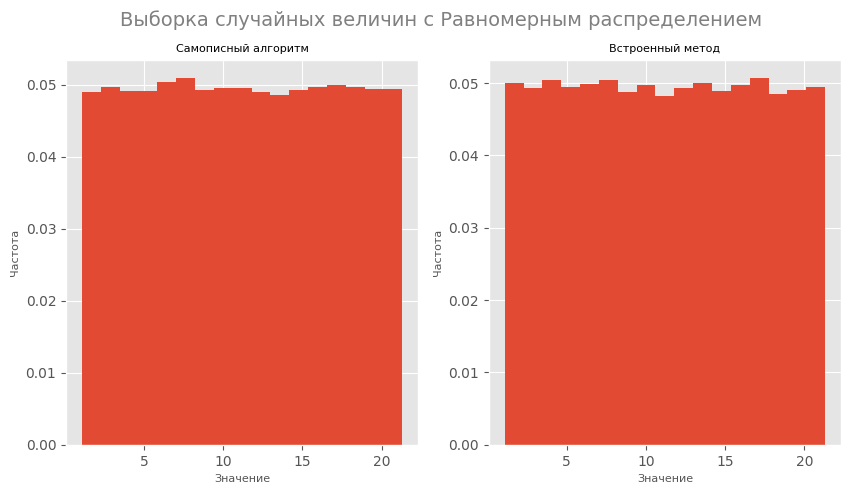

In [200]:
plt.figure(figsize=(10, 5))
m5 = sturges_rule(N_uniform)
                  
plt.subplot (1,2,1)
plt.hist(uniform_vars, bins = m5,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)

plt.subplot (1,2,2)
plt.hist(uniform_vars_check, bins = m5,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с Равномерным распределением', fontsize=14, color = 'gray')
plt.show()

### Задание 1.6

#### Самописная функция

In [116]:
@jit(nopython = True)
def generation_exp_random_var (Lambda : np.double) :
    """
    Генерирует псевдослучайную величину X ~ Exp(λ).
    :param Lambda: Параметр скорости λ
    :return: X ~ Exp(λ).
    """
    u = np.random.uniform(0,1)
    x = - np.log(1- u) / Lambda 
    return x

In [117]:
Lambda_exp = 2
N_exp = 100000

In [118]:
exp_vars = []
for i in range (N_exp):
    exp_vars.append(generation_exp_random_var(Lambda_exp))

#### Встроенная реализация

In [119]:
exp_vars_check = np.random.exponential(1/Lambda_exp, N_exp)

#### Сравнение

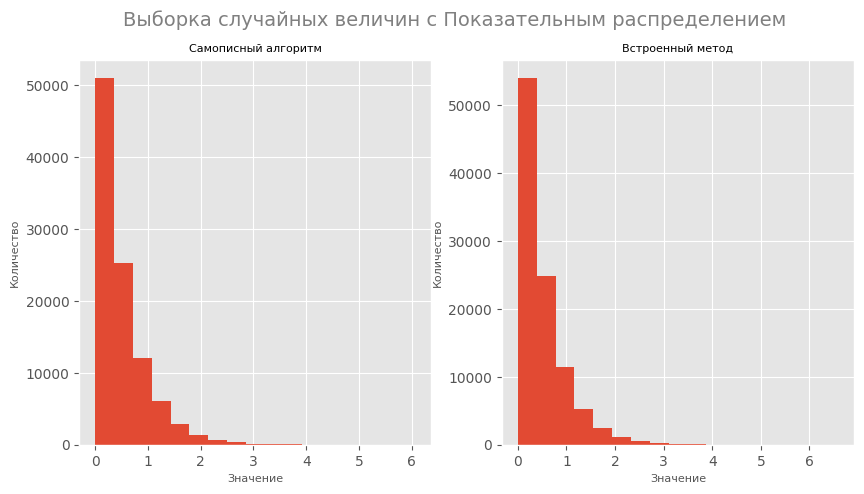

In [120]:
plt.figure(figsize=(10, 5))
m6 = sturges_rule(N_exp)
                  
plt.subplot (1,2,1)
plt.hist(exp_vars, bins = m6,  density=False)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Количество', fontsize=8)

plt.subplot (1,2,2)
plt.hist(exp_vars_check, bins = m6,  density=False)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с Показательным распределением', fontsize=14, color = 'gray')
plt.show()

### Задание 1.7

#### Самописная функция

In [122]:
@jit(nopython = True)
def sign (x : np.double) -> int:
    if x<0 :
        return -1
    return 1

In [123]:
@jit(nopython = True)
def generation_Laplace_random_var (a : np.double = 1, b : np.double = 0) -> np.double:
    """
    Генерирует случайную величину X∼Laplace(a,b).
    :param a: параметр масштаба (a>0).
    :param b: параметр сдвига (-inf < b < +inf).
    :return: X∼Laplace(a,b).
    """
    exp_var = generation_exp_random_var(1.0/a)
    return b + sign(np.random.uniform(-1,1))*exp_var
    

In [124]:
a_Laplace = 13
N_Laplace = 100000

In [125]:
Laplace_vars = []
for i in range (N_Laplace):
    Laplace_vars.append(generation_Laplace_random_var(a_Laplace))

#### Встроенная реализация

In [126]:
Laplace_vars_check = np.random.laplace(0, a_Laplace, N_Laplace)

#### Сравнение

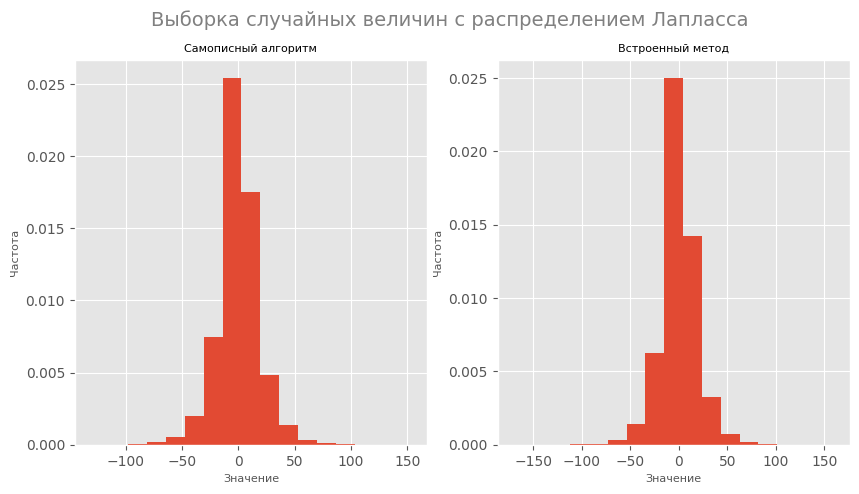

In [127]:
plt.figure(figsize=(10, 5))
m7 = sturges_rule(N_Laplace)
                  
plt.subplot (1,2,1)
plt.hist(Laplace_vars, bins = m7,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)

plt.subplot (1,2,2)
plt.hist(Laplace_vars_check, bins = m7,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с распределением Лапласса', fontsize=14, color = 'gray')
plt.show()

### Задание 1.8

***Справка***. **Нормальное распределение**
Нормальное (гауссово) распределение характеризуется функцией плотности вероятности:

\\[ f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \\]

Где:
- \\(\mu\\): Математическое ожидание случайной величины;
- \\(\sigma\\): Стандартное отклонение случайной величины.

Для моделирования нормально распределенной случайной величины использовано преобразование Бокса-Мюллера, позволяющее трансформировать равномерно распределенные случайные величины в случайные величины со стандартным нормальным распределением.

Генерирование псевдослучайной величины \\(X \sim \\N(\mu,\sigma)\\), подчиняющейся нормальному распределению с заданными параметрами \\(\mu\\) и \\(\sigma\\), производится путём выполнения следующих операций:

1. Генерирование двух независимых случайных величин \\(u_{1}, u_{2} \sim U(0,1)\\).

2. Получение  \\(x \sim \\N(0,1)\\), имеющей стандартное нормальное распределение с математическим ожиданием 0 и дисперсией 1, и вычисляющейся по следующей формуле:

\\[ x = \sqrt{-2 \ln u_{1}} \cos(2\pi u_{2}) \\]

3. Получение искомой псевдослучайной величины \\( X \\) по формуле:

\\[ X = \mu + \sigma x \\]

#### Самописная функция

In [130]:
@jit(nopython = True)
def generation_normal_random_var(mu : np.double, sigma : np.double) -> np.double:
    """
    Генерирует случайную величину X∼N(mu,sigma)
    :param mu: Математическое ожидание случайной величины.
    :param sigma: Стандартное отклонение случайной величины.
    :return: X∼N(mu,sigma)
    """
    u1 = np.random.random()
    u2 = np.random.random()
    
    x = math.sqrt(-2 * math.log(u1)) * math.cos( 2 * math.pi * u2)
    X = mu + sigma * x
    return X

In [131]:
mu_normal = 3
sigma_normal = 2
N_normal = 10000

In [132]:
normal_vars = []
for i in range (N_normal):
    normal_vars.append(generation_normal_random_var(mu_normal, sigma_normal))

#### Встроенная реализация

In [133]:
normal_vars_check = np.random.normal(mu_normal, sigma_normal, N_normal)

#### Сравнение

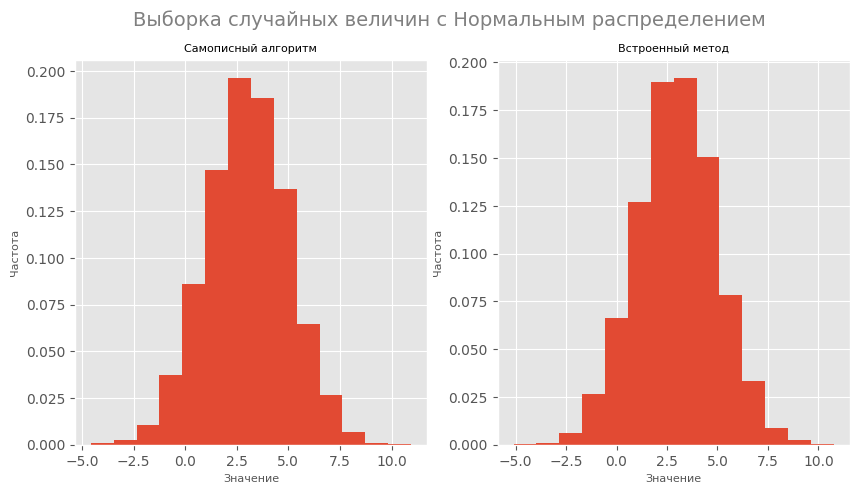

In [135]:
plt.figure(figsize=(10, 5))
m8 = sturges_rule(N_normal)
                  
plt.subplot (1,2,1)
plt.hist(normal_vars, bins = m8,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)

plt.subplot (1,2,2)
plt.hist(normal_vars_check, bins = m8,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)

plt.suptitle('Выборка случайных величин с Нормальным распределением', fontsize=14, color = 'gray')
plt.show()

### Задание 1.9

***Справка***.
**Распределение Коши**

Распределение Коши \\( C(a, b) \\) с параметрами сдвига \\( b \\) и масштаба \\( a > 0 \\) характеризуется функцией плотности вероятности:

\\[ f(x; a, b) = \frac{1}{\pi a \left[1 + \left(\frac{x - b}{a}\right)^2\right]} \\]

Для моделирования случайной величины \\(X \sim \\C(a,b)\\) в функции используется метод обратного преобразования, позволяющий при наличии генератора выборки из стандартного непрерывного равномерного распределения получить искомую выборку при помощи обратной функции распределения Коши:

\\[ F^{-1}(u) = b + a \cdot \tan\left(\pi \left(u - \frac{1}{2}\right)\right) \\]

Таким образом, для генерирования псевдослучайной величины \\( u \sim C(a, b) \\) выполняются следующие операции:

1. Генерирование псевдослучайной величины  \\(X \sim U(0,1)\\).
2. На основании обратной функции распределения Коши вычисляется псевдослучайная величина из заданного распределения Коши по формуле:

\\[ X_i = b + a \cdot \tan\left(\pi \left(u - \frac{1}{2}\right)\right) \\]


In [139]:
@jit(nopython = True)
def generation_Cauchy_random_var (a : np.double = 1, b : np.double = 0) -> np.double:
    """
    Генерирует случайную величину X∼Cauchy(a,b).
    :param a: параметр масштаба (a>0).
    :param b: параметр сдвига (-inf < b < +inf).
    :return: X∼Cauchy(a,b).
    """
    u = np.random.random()
    return b + a * math.tan(math.pi * (u - 0.5))

In [140]:
a_Cauchy = 1
b_Cauchy  = 0
N_Cauchy = 1000

In [141]:
Cauchy_vars = []
for i in range (N_Cauchy):
    Cauchy_vars.append(generation_Cauchy_random_var(a_Cauchy, b_Cauchy))


#### Встроенная реализация

In [142]:
Cauchy_vars_check = np.random.standard_cauchy(N_Cauchy) * a_Cauchy + b_Cauchy

#### Сравнение

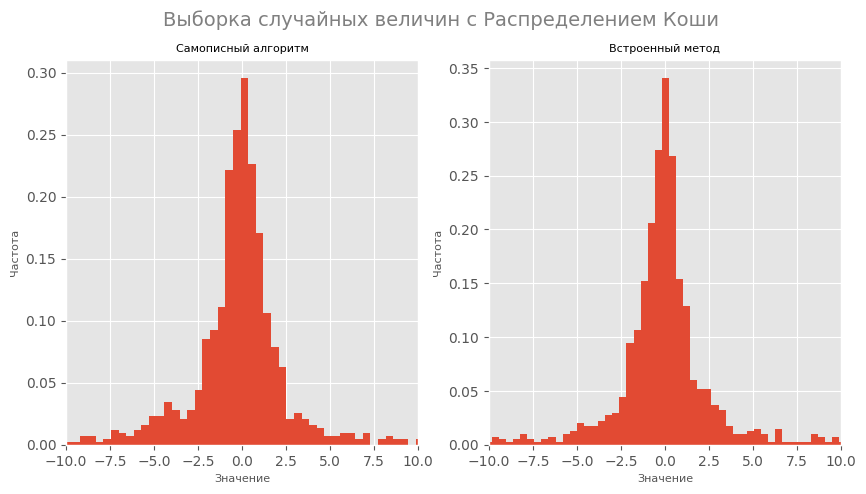

In [143]:
plt.figure(figsize=(10, 5))
m9 = sturges_rule(N_Cauchy)
                  
plt.subplot (1,2,1)
plt.hist(Cauchy_vars, bins = 'auto',  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.xlim(-10, 10)

plt.subplot (1,2,2)
plt.hist(Cauchy_vars_check, bins = 'auto',  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title('Встроенный метод', fontsize=8)
plt.xlim(-10, 10)

plt.suptitle('Выборка случайных величин с Распределением Коши', fontsize=14, color = 'gray')
plt.show()

### Задание 1.10

In [213]:
def additional_generator() -> np.double:
    U = np.random.random()
    return np.sqrt(-1 / (U - 1))

In [214]:
N_additional = 10000

In [215]:
additional_vars = []
for i in range (N_additional):
    additional_vars.append(additional_generator())

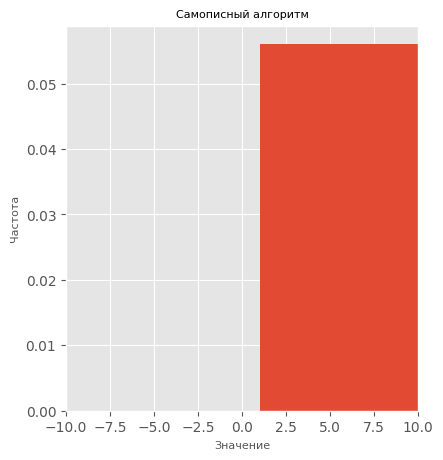

In [216]:
plt.figure(figsize=(10, 5))
m10 = sturges_rule(N_additional)
                  
plt.subplot (1,2,1)
plt.hist(additional_vars, bins = m10,  density=True)
plt.title('Самописный алгоритм', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.xlim(-10, 10)

plt.show()


## Задание 2

In [59]:
def calculation_sampling_asymmetry_coefficient( N : int, sample : np.ndarray) -> np.double:
   """
   Функция рассчитывает коэффициент ассиметрии для выборки распределения.
   :param N: количество элементов в выборке.
   :param sample: выборка.
   :return: коэффициент ассиметрии.
   """ 
   mean = np.mean(sample)

   s = np.std(sample, ddof=1)
   
   cube_deviation_from_the_mean = [(x - mean)**3 for x in sample]
   cube_deviation_per_s3 = [x / s**3 for x in cube_deviation_from_the_mean]
   
   A = (N/((N-1)*(N-2))) * sum(cube_deviation_per_s3)
   
   return A

In [152]:
def calculation_sampling_kurtosis(N : int, sample : np.ndarray) -> np.double:
    """
    Функция рассчитывает выборочный эксцесс.
    :param N: количество элементов в выборке.
    :param sample: выборка.
    :return: выборочный эксцесс.
    """
    mean = np.mean(sample)
    
    s = np.std(sample, ddof=1)
    
    fourth_power_deviations_from_the_mean = [(x - mean)**4 for x in sample]
    
    kurtosis = sum(fourth_power_deviations_from_the_mean)/(N)
    kurtosis = kurtosis/(s**4) 
    kurtosis = kurtosis - 3
    return kurtosis

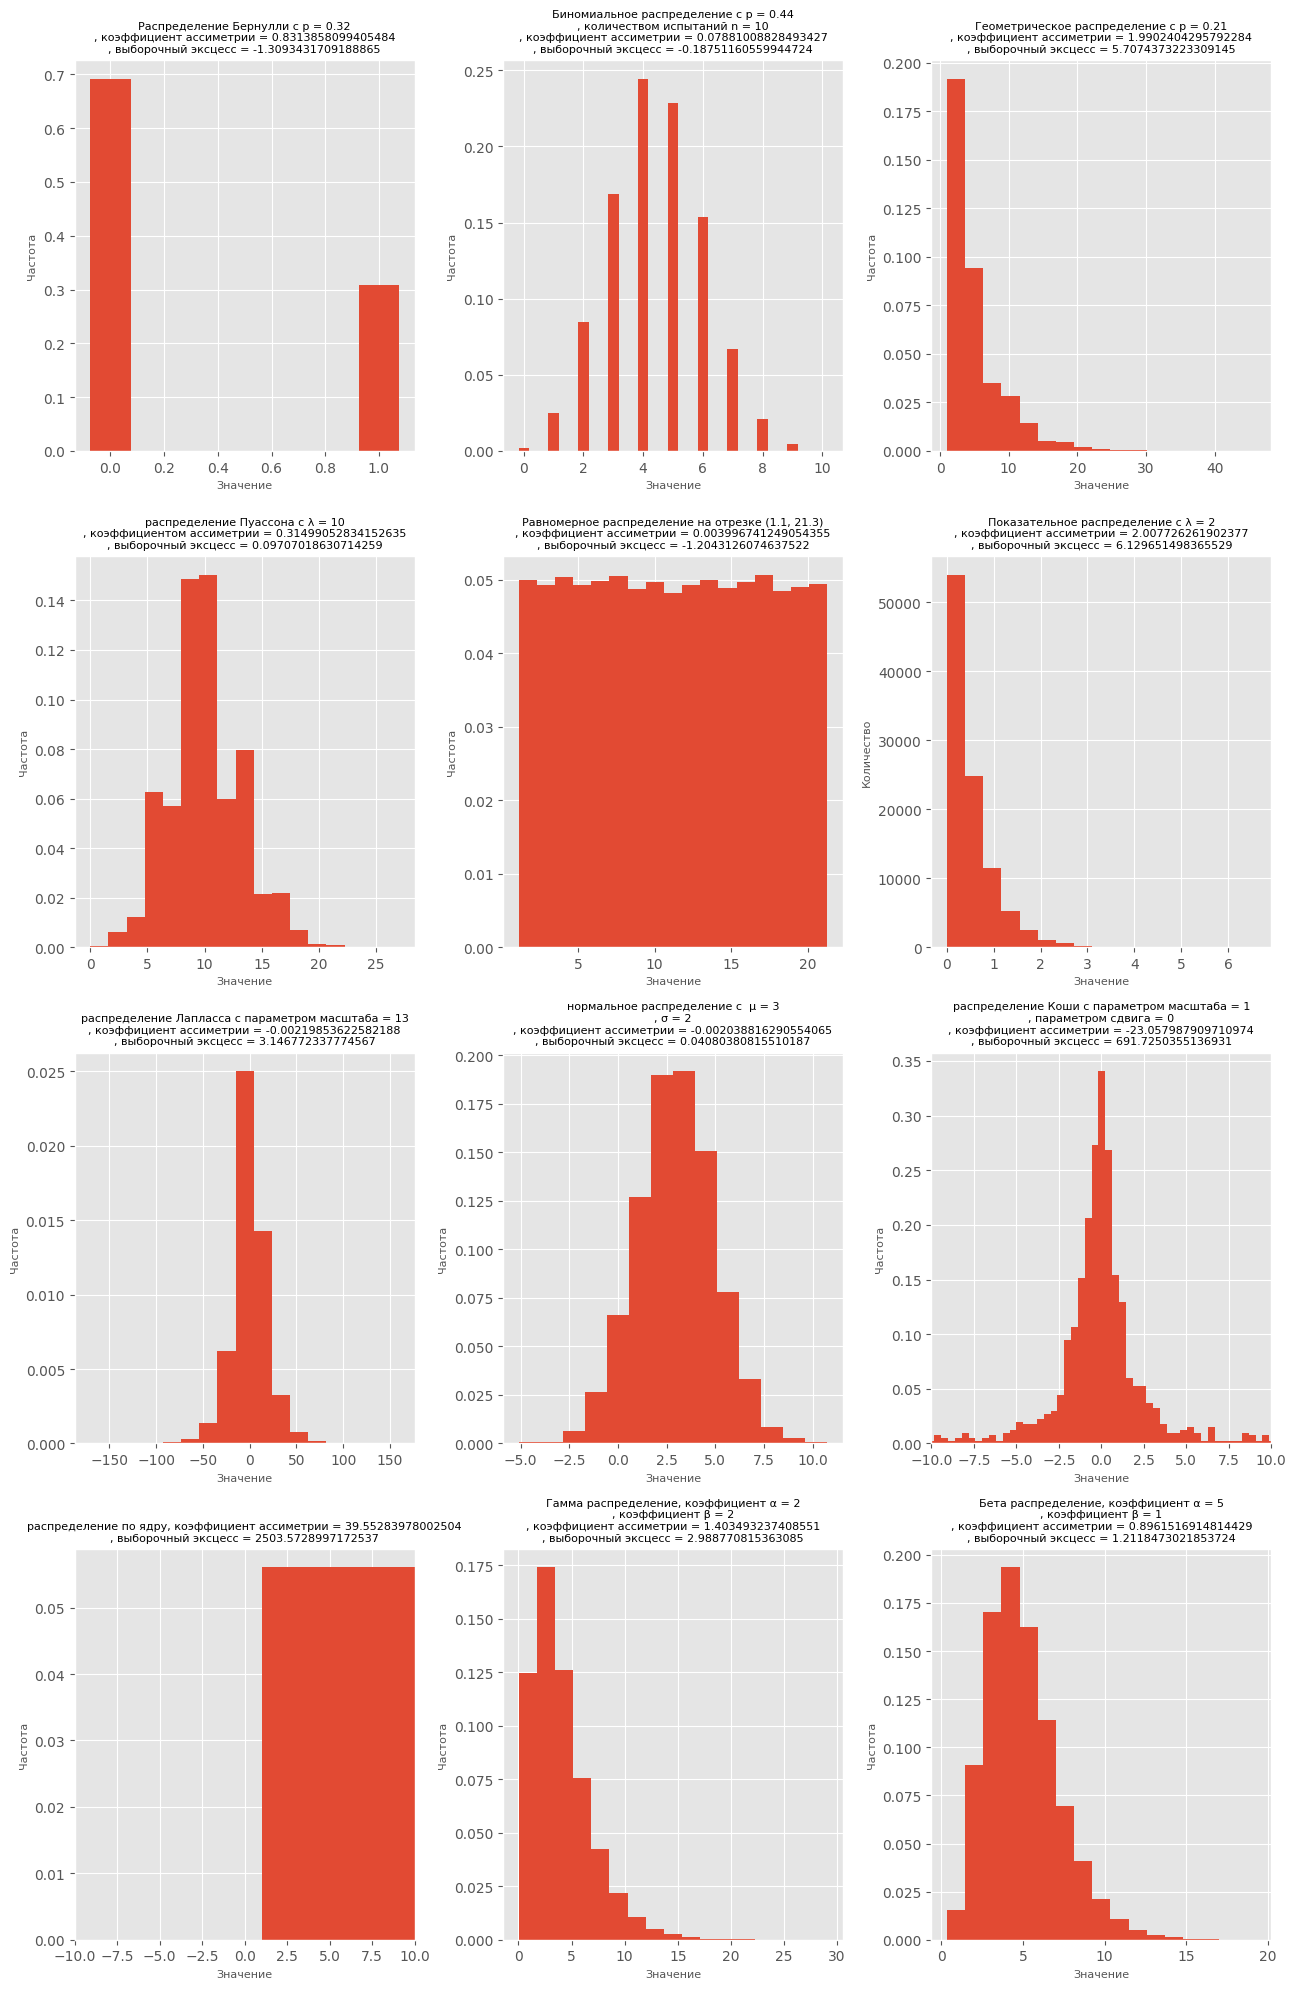

In [227]:
plt.figure(figsize=(13, 20))


## Распределение Бернули
plt.subplot (4,3,1)
counter = Counter(Bernoulian_vars_check)
X_Bernoulian_check = list(counter.keys())
Y_Bernoulian_check = list(counter.values())
Y_Bernoulian_check = [y / N_Ber for y in Y_Bernoulian_check]

skewness_Ber = calculation_sampling_asymmetry_coefficient(N_Ber, Bernoulian_vars_check)
kurtosis_Ber = calculation_sampling_kurtosis(N_Ber, Bernoulian_vars_check)

plt.title(f'Распределение Бернулли c p = {P_Ber}\n, коэффициент ассиметрии = {skewness_Ber}\n, выборочный эксцесс = {kurtosis_Ber}', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Bernoulian_check, Y_Bernoulian_check, width=0.15)


##Биномиальное распределение
skewness_Bin = calculation_sampling_asymmetry_coefficient(N_Bin, Binomial_vars_check)
kurtosis_Bin = calculation_sampling_kurtosis(N_Bin,Binomial_vars_check)
plt.subplot (4,3,2)
counter = Counter(Binomial_vars_check)
X_Binomial_check = list(counter.keys())
Y_Binomial_check = list(counter.values())
Y_Binomial_check = [y / N_Ber for y in Y_Binomial_check]

plt.title(f'Биномиальное распределение c p = {P_Bin}\n, количеством испытаний n = {n_Bin}\n, коэффициент ассиметрии = {skewness_Bin}\n, выборочный эксцесс = {kurtosis_Bin}', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.bar(X_Binomial_check, Y_Binomial_check, width=0.35)


##Геометрическое распределение
skewness_Geo = calculation_sampling_asymmetry_coefficient(N_Geo, Geometric_vars_check)
kurtosis_Geo = calculation_sampling_kurtosis(N_Geo, Geometric_vars_check)

plt.subplot (4,3,3)
plt.hist(Geometric_vars_check, bins = m3,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'Геометрическое распределение c p = {P_Geo}\n, коэффициент ассиметрии = {skewness_Geo}\n, выборочный эксцесс = {kurtosis_Geo}', fontsize=8)


## Распределение Пуассона
skewness_Poisson = calculation_sampling_asymmetry_coefficient(N_Poisson, Poisson_vars_check)
kurtosis_Poisson = calculation_sampling_kurtosis(N_Poisson, Poisson_vars_check)

plt.subplot (4,3,4)
plt.hist(Poisson_vars_check, bins = m4,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'распределение Пуассона c λ = {Lambda_Poisson}\n, коэффициентом ассиметрии = {skewness_Poisson}\n, выборочный эксцесс = {kurtosis_Poisson}', fontsize=8)


## Равномерное распределение
skewness_uniform = calculation_sampling_asymmetry_coefficient(N_uniform, uniform_vars_check)
kurtosis_uniform = calculation_sampling_kurtosis(N_uniform, uniform_vars_check)

plt.subplot (4,3,5)
plt.hist(uniform_vars_check, bins = m5,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'Равномерное распределение на отрезке ({a_uniform}, {b_uniform})\n, коэффициент ассиметрии = {skewness_uniform}\n, выборочный эксцесс = {kurtosis_uniform}', fontsize=8)


## Показательное распределение
skewness_exp = calculation_sampling_asymmetry_coefficient(N_exp, exp_vars_check)
kurtosis_exp = calculation_sampling_kurtosis(N_exp, exp_vars_check)

plt.subplot (4,3,6)
plt.hist(exp_vars_check, bins = m6,  density=False)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.title(f'Показательное распределение c λ = {Lambda_exp}\n, коэффициент ассиметрии = {skewness_exp}\n, выборочный эксцесс = {kurtosis_exp}', fontsize=8)


## Распределение Лапласса
skewness_Laplace = calculation_sampling_asymmetry_coefficient(N_Laplace, Laplace_vars_check)
kurtosis_Laplace = calculation_sampling_kurtosis(N_Laplace, Laplace_vars_check)

plt.subplot (4,3,7)
plt.hist(Laplace_vars_check, bins = m7,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'распределение Лапласса с параметром масштаба = {a_Laplace}\n, коэффициент ассиметрии = {skewness_Laplace}\n, выборочный эксцесс = {kurtosis_Laplace}', fontsize=8)


## Нормальное распределение
skewness_normal = calculation_sampling_asymmetry_coefficient(N_normal, normal_vars_check)
kurtosis_normal = calculation_sampling_kurtosis(N_normal, normal_vars_check)

plt.subplot (4,3,8)
plt.hist(normal_vars_check, bins = m8,  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'нормальное распределение с  μ = {mu_normal}\n, σ = {sigma_normal}\n, коэффициент ассиметрии = {skewness_normal}\n, выборочный эксцесс = {kurtosis_normal}', fontsize=8)


## Распределение Коши
skewness_Cauchy = calculation_sampling_asymmetry_coefficient(N_Cauchy, Cauchy_vars_check)
kurtosis_Cauchy = calculation_sampling_kurtosis(N_Cauchy, Cauchy_vars_check)

plt.subplot (4,3,9)
plt.hist(Cauchy_vars_check, bins = 'auto',  density=True)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.title(f'распределение Коши с параметром масштаба = {a_Cauchy}\n, параметром сдвига = {b_Cauchy}\n, коэффициент ассиметрии = {skewness_Cauchy}\n, выборочный эксцесс = {kurtosis_Cauchy}', fontsize=8)
plt.xlim(-10, 10)


## additional
skewness_additional = calculation_sampling_asymmetry_coefficient(N_additional, additional_vars)
kurtosis_additional = calculation_sampling_kurtosis(N_additional, additional_vars)


plt.subplot (4,3,10)
plt.hist(additional_vars, bins = m10,  density=True)
plt.title(f'распределение по ядру, коэффициент ассиметрии = {skewness_additional}\n, выборочный эксцесс = {kurtosis_additional}', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)
plt.xlim(-10, 10)


### Гамма Распределение
a_gamma = 2
b_gamma = 2
N_gamma = 100000
gamma_vars = np.random.gamma(a_gamma, b_gamma, N_gamma)
m11 = sturges_rule(N_gamma)

skewness_gamma = calculation_sampling_asymmetry_coefficient(N_gamma, gamma_vars)
kurtosis_gamma = calculation_sampling_kurtosis(N_gamma, gamma_vars)

plt.subplot (4,3,11)
plt.hist(gamma_vars, bins = m11,  density=True)
plt.title(f'Гамма распределение, коэффициент α = {a_gamma}\n, коэффициент β = {b_gamma}\n, коэффициент ассиметрии = {skewness_gamma}\n, выборочный эксцесс = {kurtosis_gamma}', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)


### Бета Распределение
a_beta = 5
b_beta = 1
N_beta = 100000
m12 = sturges_rule(N_beta)
beta_vars = np.random.gamma(a_beta, b_beta, N_beta)

skewness_beta = calculation_sampling_asymmetry_coefficient(N_beta, beta_vars)
kurtosis_beta = calculation_sampling_kurtosis(N_beta, beta_vars)

plt.subplot (4,3,12)
plt.hist(beta_vars, bins = m12,  density=True)
plt.title(f'Бета распределение, коэффициент α = {a_beta}\n, коэффициент β = {b_beta}\n, коэффициент ассиметрии = {skewness_beta}\n, выборочный эксцесс = {kurtosis_beta}', fontsize=8)
plt.xlabel('Значение', fontsize=8)
plt.ylabel('Частота', fontsize=8)


plt.tight_layout()
plt.show()

## Задание 3


***справка***:

a) Для непрерывной равномерной случайной величины X ~ U[a,b], определенной на интервале ([a, b]), имеют место следующие моменты:
1. \\({E}[X] = \frac{a + b}{2}\\)
2. \\(D[X] = \frac{(b - a)^2}{12}\\)

б) Если \\(\xi_1, \xi_2, ... \xi_n\\) — независимые и одинаково распределённые случайные величины с ненулевой конечной дисперсией ( 0 < \\(D[xi_1]\\) < $inf$), то имеет место следующее приближение:

\\(P(\frac{\xi_1 + ... + \xi_n - {E}[\xi_1]}{\sqrt{nD[\xi_1]}} \in A) \approx P(\eta \in A)\\)

*где \\(\eta\\) имеет стандартное нормальное распределение.



In [238]:
@jit(nopython = True)
def generation_random_normal_var_clt(n : int, N : int) ->np.double:
    """
    Генерирует N случайных величину X∼N(0,1)
    param N : количество сгенерированных случайных величин X∼N(0,1)
    param n : количество случайных величин необходимых для генерации X∼N(0,1)
    :return: X∼N(0,1) 
    """
    normal_clt_vars = []
    for i in range (N):
        random_vars = np.random.random(n)
        x = (sum(random_vars) - n * 0.5 ) / (math.sqrt(n / 12))
        normal_clt_vars.append(x)
    return normal_clt_vars

In [239]:
N_normal_clt = 10000
n_clt = 10
normal_clt = generation_random_normal_var_clt(n_clt, N_normal_clt)

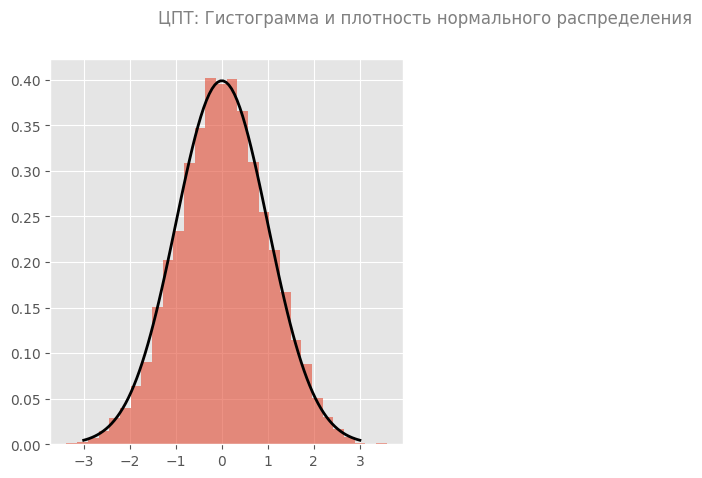

In [242]:
plt.figure(figsize=(10, 5))
m13 = sturges_rule(N_normal_clt)
                  
plt.subplot (1,2,1)
plt.hist(normal_clt, bins=30, density=True, alpha=0.6)
x = np.linspace(-3, 3, 100)
plt.plot(x, (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), color='black', lw=2)
plt.suptitle("ЦПТ: Гистограмма и плотность нормального распределения", color = 'gray')
plt.show()